In [2]:
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

datapath = 'Sim Data (Clusters=1000, Seed=8561)' # all of the data is within a folder in this .ipynb file's directory
GalaxyNames = []
for clusterFile in os.listdir(datapath + '/Star Clusters'):
    GalaxyNames.append(clusterFile[:-4]) # this gets the name of the cluster, without the `.txt' file extension
    



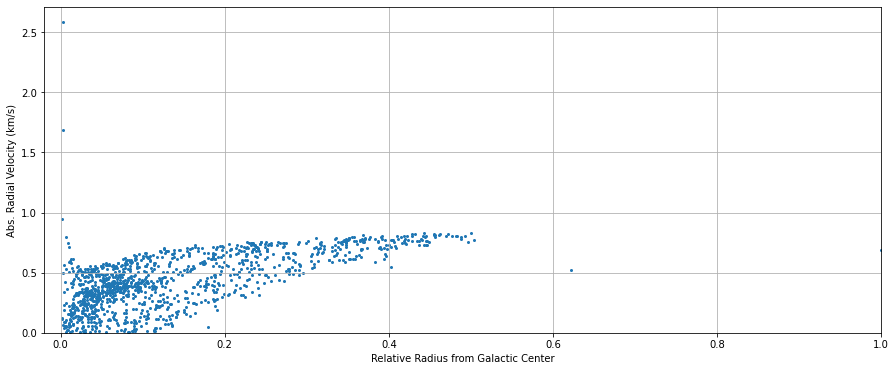

In [39]:
# read the data from the .txt file into a dataframe
galaxdata = pd.read_csv(datapath + f'/Star Clusters/{GalaxyNames[10]}.txt', delimiter=' ')
galaxEquat, galaxPolar = np.mean(galaxdata['Equatorial']), np.mean(galaxdata['Polar'])
galaxVel = np.mean(galaxdata['RadialVelocity'])
sqEquats = (galaxdata['Equatorial'] - galaxEquat)**2 
sqPolars = (galaxdata['Polar'] - galaxPolar)**2 
orbitRadii = np.sqrt(sqEquats + sqPolars)
orbitRadii = orbitRadii / max(orbitRadii)
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(orbitRadii, abs(galaxdata['RadialVelocity'] - galaxVel), s=4)
ax.set_xlabel("Relative Radius from Galactic Center")
ax.set_ylabel("Abs. Radial Velocity (km/s)")
ax.set_ylim(ymin=0); ax.set_xlim(-0.02, 1)
ax.grid()